In [1]:
from apiclient.discovery import build
import argparse
import csv
import pandas as pd
DEVELOPER_KEY='x'
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"

In [4]:
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=DEVELOPER_KEY)


In [96]:
# 'business administration' query

# The index error shows that before 1500 queries it has queried all the
#'business administration' topic videos in the entire youtube

titles=[]
videoIDs=[]
publishTIME=[]
viewsList=[]
likesList=[]
dislikesList=[]
commentsList=[]
durationList=[]
next_page_token = None
for j in range(30):
    search_response=search_response = youtube.search().list(q="business administration",
                                                            part="id,snippet",
                                                            maxResults=50,
                                                            pageToken=next_page_token).execute()
    for i in range(50):
        if 'channelId' in search_response['items'][i]['id'] or 'playlistId' in search_response['items'][i]['id']:
            continue
        x=search_response['items'][i]['id']['videoId']
        
        
        res = youtube.videos().list(id=x,
                                   part='statistics').execute()
        if 'likeCount' in res['items'][0]['statistics'] and 'dislikeCount' in res['items'][0]['statistics'] and 'commentCount' in res['items'][0]['statistics']:
            titles.append(search_response['items'][i]['snippet']['title'])
            publishTIME.append(search_response['items'][i]['snippet']['publishedAt'])
            videoIDs.append(x)
            viewsList.append(res['items'][0]['statistics']['viewCount'])
            likesList.append(res['items'][0]['statistics']['likeCount'])
            dislikesList.append(res['items'][0]['statistics']['dislikeCount'])

            commentsList.append(res['items'][0]['statistics']['commentCount'])

            res1 = youtube.videos().list(id=x,
                                       part='contentDetails').execute()
            durationList.append(res1['items'][0]['contentDetails']['duration'])
        
    next_page_token=search_response.get('nextPageToken')

IndexError: list index out of range

In [98]:
# business administartion df
a=[titles,
videoIDs,
publishTIME,
viewsList,
likesList,
dislikesList,
commentsList,
durationList]
for i in a:
    print(len(i))
b={'titles':titles,
    'videoIDs':videoIDs,
   'publishTIME':publishTIME,
   'viewsList':viewsList,
   'likesList':likesList,
   'dislikesList':dislikesList,
   'commentsList':commentsList,
    'durationList':durationList
  }
import pandas as pd
df=pd.DataFrame(b)
df.head()

512
512
512
512
512
512
512
512


,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList
0,What is Business Administration? What is Busin...,nnd8m2WZwi0,2016-04-25T03:07:56Z,139230,1133,112,29,PT3M25S
1,Business Administration - Lecture 01,4Zr_sisiwaU,2018-01-22T16:22:57Z,102520,1453,38,66,PT12M17S
2,How to study business and Get Work Permit in C...,OoSkcBX79PU,2019-11-06T16:57:05Z,18398,1032,12,535,PT9M27S
3,B.Com in Business Administration | Admission &...,FsaBCBWDses,2019-11-05T09:30:01Z,786,38,0,8,PT6M
4,BBA course details in Hindi | Bachelor of Busi...,g7PJ6tsvfiA,2017-06-24T17:42:45Z,506729,10379,683,3151,PT7M58S


In [144]:
df.to_csv('business_admin.csv',index=False)

In [100]:
df.describe()

,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList
count,512,512,512,512,512,512,512,512
unique,461,478,477,454,160,57,80,354
top,Business Administration,BkinBg-f6lo,2014-10-17T15:10:23Z,0,0,0,0,PT31S
freq,11,2,2,6,34,254,234,10


In [105]:
# 2 'human resource' query

# The Key error is showing that in the last video which the cell queried doesn't have 
# viewCount value.So ignoring that video by deleting the last row.

titles=[]
videoIDs=[]
publishTIME=[]
viewsList=[]
likesList=[]
dislikesList=[]
commentsList=[]
durationList=[]
next_page_token = None
for j in range(30):
    search_response=search_response = youtube.search().list(q="human resource management",
                                                            part="id,snippet",
                                                            maxResults=50,
                                                            pageToken=next_page_token).execute()
    for i in range(50):
        if 'channelId' in search_response['items'][i]['id'] or 'playlistId' in search_response['items'][i]['id']:
            continue
        x=search_response['items'][i]['id']['videoId']
        
        
        res = youtube.videos().list(id=x,
                                   part='statistics').execute()
        if 'likeCount' in res['items'][0]['statistics'] and 'dislikeCount' in res['items'][0]['statistics'] and 'commentCount' in res['items'][0]['statistics']:
            titles.append(search_response['items'][i]['snippet']['title'])
            publishTIME.append(search_response['items'][i]['snippet']['publishedAt'])
            videoIDs.append(x)
            viewsList.append(res['items'][0]['statistics']['viewCount'])
            likesList.append(res['items'][0]['statistics']['likeCount'])
            dislikesList.append(res['items'][0]['statistics']['dislikeCount'])

            commentsList.append(res['items'][0]['statistics']['commentCount'])

            res1 = youtube.videos().list(id=x,
                                       part='contentDetails').execute()
            durationList.append(res1['items'][0]['contentDetails']['duration'])
        
    next_page_token=search_response.get('nextPageToken')

KeyError: 'viewCount'

In [111]:
# human resource df
c=[titles,
videoIDs,
publishTIME,
viewsList,
likesList,
dislikesList,
commentsList,
durationList]
for i in c:
    print(len(i))
    
d={'titles':titles,
    'videoIDs':videoIDs,
   'publishTIME':publishTIME,
   'viewsList':viewsList,
   'likesList':likesList,
   'dislikesList':dislikesList,
   'commentsList':commentsList,
    'durationList':durationList
  }
import pandas as pd
df1=pd.DataFrame(d)
df1.head()

535
535
535
535
535
535
535
535


,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList
0,HUMAN RESOURCE MANAGEMENT (HRM) IN HINDI | Mea...,WzXNhwSWEnc,2020-04-27T07:45:00Z,20311,742,15,48,PT24M52S
1,HR Basics: Human Resource Management,A2HFusWQIeE,2018-10-01T17:00:01Z,231482,2601,72,58,PT6M51S
2,INTRODUCTION INTO HUMAN RESOURCES MANAGEMENT -...,c8_avX9miag,2013-09-27T14:24:07Z,1000194,10801,381,514,PT35M57S
3,Human Resource Management Introduction HRM-1 (...,orbJxHV-WAI,2017-12-03T09:32:09Z,569532,10006,488,1995,PT12M17S
4,What is human resource and human resource mana...,PLNskr4dN9I,2020-03-05T06:36:30Z,14636,345,14,20,PT3M12S


In [145]:
df1.to_csv('human_resource.csv',index=False)

In [123]:
#3 data science query

# The Key error is showing that in the last video which the cell queried doesn't have 
# viewCount value.So ignoring that video by deleting the last row.

titles=[]
videoIDs=[]
publishTIME=[]
viewsList=[]
likesList=[]
dislikesList=[]
commentsList=[]
durationList=[]
next_page_token = None
for j in range(30):
    search_response=search_response = youtube.search().list(q="data science",
                                                            part="id,snippet",
                                                            maxResults=50,
                                                            pageToken=next_page_token).execute()
    for i in range(50):
        if 'channelId' in search_response['items'][i]['id'] or 'playlistId' in search_response['items'][i]['id']:
            continue
        x=search_response['items'][i]['id']['videoId']
        
        
        res = youtube.videos().list(id=x,
                                   part='statistics').execute()
        if 'likeCount' in res['items'][0]['statistics'] and 'dislikeCount' in res['items'][0]['statistics'] and 'commentCount' in res['items'][0]['statistics']:
            titles.append(search_response['items'][i]['snippet']['title'])
            publishTIME.append(search_response['items'][i]['snippet']['publishedAt'])
            videoIDs.append(x)
            viewsList.append(res['items'][0]['statistics']['viewCount'])
            likesList.append(res['items'][0]['statistics']['likeCount'])
            dislikesList.append(res['items'][0]['statistics']['dislikeCount'])

            commentsList.append(res['items'][0]['statistics']['commentCount'])

            res1 = youtube.videos().list(id=x,
                                       part='contentDetails').execute()
            durationList.append(res1['items'][0]['contentDetails']['duration'])
        
    next_page_token=search_response.get('nextPageToken')

KeyError: 'viewCount'

In [130]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   titles        519 non-null    object
 1   videoIDs      519 non-null    object
 2   publishTIME   519 non-null    object
 3   viewsList     519 non-null    object
 4   likesList     519 non-null    object
 5   dislikesList  519 non-null    object
 6   commentsList  519 non-null    object
 7   durationList  519 non-null    object
dtypes: object(8)
memory usage: 32.6+ KB


In [131]:
df2.describe()

,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList
count,519,519,519,519,519,519,519,519
unique,452,452,452,445,363,116,192,412
top,Real Talk with Google Data Scientist (with a P...,I3FBJdiExcg,2020-08-17T18:22:31Z,263,2,0,0,PT12M10S
freq,3,3,3,3,9,90,65,4


In [146]:
df2.to_csv('data_science.csv',index=False)

In [127]:
# data science df
c=[titles,
videoIDs,
publishTIME,
viewsList,
likesList,
dislikesList,
commentsList,
durationList]
for i in c:
    print(len(i))
    
d={'titles':titles,
    'videoIDs':videoIDs,
   'publishTIME':publishTIME,
   'viewsList':viewsList,
   'likesList':likesList,
   'dislikesList':dislikesList,
   'commentsList':commentsList,
    'durationList':durationList
  }
import pandas as pd
df2=pd.DataFrame(d)
df2.head()

# titles.pop()
# videoIDs.pop()
# publishTIME.pop()

519
519
519
519
519
519
519
519


,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList
0,Data Science In 5 Minutes | Data Science For B...,X3paOmcrTjQ,2018-12-04T14:30:01Z,1201359,16192,654,682,PT4M38S
1,Data Science Full Course - Learn Data Science ...,-ETQ97mXXF0,2019-08-18T08:30:02Z,878011,20902,256,285,PT10H23M57S
2,FREE Data Science Online Courses with FREE cer...,XOgx6OyGF1Y,2020-07-15T12:57:27Z,13153,1007,19,94,PT8M1S
3,Data Science in Hindi,qcqT5SqE8BY,2019-02-25T12:30:02Z,251903,9921,330,711,PT9M46S
4,Data Science in 8 Minutes | Data Science for B...,KdgQvgE3ji4,2019-03-31T10:23:01Z,172174,3873,60,37,PT8M15S


In [143]:
#4 machine learning query

# The Key error is showing that in the last video which the cell queried doesn't have 
# viewCount value.So ignoring that video by deleting the last row.

titles=[]
videoIDs=[]
publishTIME=[]
viewsList=[]
likesList=[]
dislikesList=[]
commentsList=[]
durationList=[]
next_page_token = None
for j in range(30):
    search_response=search_response = youtube.search().list(q="machine learning",
                                                            part="id,snippet",
                                                            maxResults=50,
                                                            pageToken=next_page_token).execute()
    for i in range(50):
        if 'channelId' in search_response['items'][i]['id'] or 'playlistId' in search_response['items'][i]['id']:
            continue
        x=search_response['items'][i]['id']['videoId']
        
        
        res = youtube.videos().list(id=x,
                                   part='statistics').execute()
        if 'likeCount' in res['items'][0]['statistics'] and 'dislikeCount' in res['items'][0]['statistics'] and 'commentCount' in res['items'][0]['statistics']:
            titles.append(search_response['items'][i]['snippet']['title'])
            publishTIME.append(search_response['items'][i]['snippet']['publishedAt'])
            videoIDs.append(x)
            viewsList.append(res['items'][0]['statistics']['viewCount'])
            likesList.append(res['items'][0]['statistics']['likeCount'])
            dislikesList.append(res['items'][0]['statistics']['dislikeCount'])

            commentsList.append(res['items'][0]['statistics']['commentCount'])

            res1 = youtube.videos().list(id=x,
                                       part='contentDetails').execute()
            durationList.append(res1['items'][0]['contentDetails']['duration'])
        
    next_page_token=search_response.get('nextPageToken')

KeyError: 'viewCount'

In [136]:
# machine learning df
c=[titles,
videoIDs,
publishTIME,
viewsList,
likesList,
dislikesList,
commentsList,
durationList]
for i in c:
    print(len(i))
    
d={'titles':titles,
    'videoIDs':videoIDs,
   'publishTIME':publishTIME,
   'viewsList':viewsList,
   'likesList':likesList,
   'dislikesList':dislikesList,
   'commentsList':commentsList,
    'durationList':durationList
  }
import pandas as pd
df3=pd.DataFrame(d)
df3.head()


525
525
525
525
525
525
525
525


,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList
0,Machine Learning Basics | What Is Machine Lear...,ukzFI9rgwfU,2018-09-19T14:57:02Z,1373340,18189,653,1422,PT7M52S
1,Machine Learning Full Course - Learn Machine L...,GwIo3gDZCVQ,2019-09-22T08:30:00Z,791750,15181,266,568,PT9H38M32S
2,What is Machine Learning?,HcqpanDadyQ,2017-08-24T21:51:40Z,552596,8435,118,136,PT5M23S
3,What is machine learning and how to learn it ?,63NTeLmDANo,2017-07-30T05:15:00Z,1059021,18821,1511,1146,PT12M9S
4,Machine Learning Basics | What Is Machine Lear...,hjh1ikznScg,2019-04-01T05:28:12Z,47515,750,26,29,PT14M14S


In [147]:
df3.to_csv('ml.csv',index=False)

In [137]:
df3.describe()

,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList
count,525,525,525,525,525,525,525,525
unique,513,515,514,515,451,198,268,465
top,Lộ trình học Machine Learning/Deep Learning từ...,ccZ2pyr3YDw,2020-01-12T11:24:31Z,18268,4,0,0,PT12M9S
freq,2,2,2,2,5,69,40,4


In [138]:
#5 android development query

# The index error shows that before 1500 queries it has queried all the
#'android development' topic videos in the entire youtube

titles=[]
videoIDs=[]
publishTIME=[]
viewsList=[]
likesList=[]
dislikesList=[]
commentsList=[]
durationList=[]
next_page_token = None
for j in range(30):
    search_response=search_response = youtube.search().list(q="android development",
                                                            part="id,snippet",
                                                            maxResults=50,
                                                            pageToken=next_page_token).execute()
    for i in range(50):
        if 'channelId' in search_response['items'][i]['id'] or 'playlistId' in search_response['items'][i]['id']:
            continue
        x=search_response['items'][i]['id']['videoId']
        
        
        res = youtube.videos().list(id=x,
                                   part='statistics').execute()
        if 'likeCount' in res['items'][0]['statistics'] and 'dislikeCount' in res['items'][0]['statistics'] and 'commentCount' in res['items'][0]['statistics']:
            titles.append(search_response['items'][i]['snippet']['title'])
            publishTIME.append(search_response['items'][i]['snippet']['publishedAt'])
            videoIDs.append(x)
            viewsList.append(res['items'][0]['statistics']['viewCount'])
            likesList.append(res['items'][0]['statistics']['likeCount'])
            dislikesList.append(res['items'][0]['statistics']['dislikeCount'])

            commentsList.append(res['items'][0]['statistics']['commentCount'])

            res1 = youtube.videos().list(id=x,
                                       part='contentDetails').execute()
            durationList.append(res1['items'][0]['contentDetails']['duration'])
        
    next_page_token=search_response.get('nextPageToken')

IndexError: list index out of range

In [141]:
# android development
c=[titles,
videoIDs,
publishTIME,
viewsList,
likesList,
dislikesList,
commentsList,
durationList]
for i in c:
    print(len(i))
    
d={'titles':titles,
    'videoIDs':videoIDs,
   'publishTIME':publishTIME,
   'viewsList':viewsList,
   'likesList':likesList,
   'dislikesList':dislikesList,
   'commentsList':commentsList,
    'durationList':durationList
  }
import pandas as pd
df4=pd.DataFrame(d)
df4.head()

533
533
533
533
533
533
533
533


,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList
0,How to become an Android Developer | Step by S...,TnTn6e4Pfn8,2019-06-29T15:40:59Z,919807,42673,1019,2578,PT17M35S
1,Android Development Tutorial in Hindi,qK0QNA0sMGc,2019-08-30T03:06:44Z,1177475,46678,1269,9621,PT1H13M40S
2,Android Full Course - Learn Android in 9 Hours...,aS__9RbCyHg,2019-12-17T14:39:47Z,705902,15871,490,143,PT8H37M5S
3,Android Development for Beginners - Full Course,fis26HvvDII,2020-05-26T16:06:03Z,274417,8299,84,387,PT11H36M27S
4,Make your first app in 10 minutes | For noobs ...,U827ccGc0J8,2020-04-28T14:58:55Z,242102,13695,409,1106,PT15M28S


In [142]:
df3.head()

,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList
0,How to become an Android Developer | Step by S...,TnTn6e4Pfn8,2019-06-29T15:40:59Z,919807,42673,1019,2578,PT17M35S
1,Android Development Tutorial in Hindi,qK0QNA0sMGc,2019-08-30T03:06:44Z,1177475,46678,1269,9621,PT1H13M40S
2,Android Full Course - Learn Android in 9 Hours...,aS__9RbCyHg,2019-12-17T14:39:47Z,705902,15871,490,143,PT8H37M5S
3,Android Development for Beginners - Full Course,fis26HvvDII,2020-05-26T16:06:03Z,274417,8299,84,387,PT11H36M27S
4,Make your first app in 10 minutes | For noobs ...,U827ccGc0J8,2020-04-28T14:58:55Z,242102,13695,409,1106,PT15M28S


In [148]:
df4.to_csv('android.csv',index=False)

In [24]:
#6 web development query

# The index error shows that before 1500 queries it has queried all the
#'web development' topic videos in the entire youtube

titles=[]
videoIDs=[]
publishTIME=[]
viewsList=[]
likesList=[]
dislikesList=[]
commentsList=[]
durationList=[]
next_page_token = None
for j in range(40):
    search_response=search_response = youtube.search().list(q="web development",
                                                            part="id,snippet",
                                                            maxResults=50,
                                                            pageToken=next_page_token).execute()
    for i in range(50):
        if 'channelId' in search_response['items'][i]['id'] or 'playlistId' in search_response['items'][i]['id']:
            continue
        x=search_response['items'][i]['id']['videoId']
        
        
        res = youtube.videos().list(id=x,
                                   part='statistics').execute()
        if 'likeCount' in res['items'][0]['statistics'] and 'dislikeCount' in res['items'][0]['statistics'] and 'commentCount' in res['items'][0]['statistics']:
            titles.append(search_response['items'][i]['snippet']['title'])
            publishTIME.append(search_response['items'][i]['snippet']['publishedAt'])
            videoIDs.append(x)
            viewsList.append(res['items'][0]['statistics']['viewCount'])
            likesList.append(res['items'][0]['statistics']['likeCount'])
            dislikesList.append(res['items'][0]['statistics']['dislikeCount'])

            commentsList.append(res['items'][0]['statistics']['commentCount'])

            res1 = youtube.videos().list(id=x,
                                       part='contentDetails').execute()
            durationList.append(res1['items'][0]['contentDetails']['duration'])
        
    next_page_token=search_response.get('nextPageToken')

IndexError: list index out of range

In [26]:
# web development
c=[titles,
videoIDs,
publishTIME,
viewsList,
likesList,
dislikesList,
commentsList,
durationList]
for i in c:
    print(len(i))
    
d={'titles':titles,
    'videoIDs':videoIDs,
   'publishTIME':publishTIME,
   'viewsList':viewsList,
   'likesList':likesList,
   'dislikesList':dislikesList,
   'commentsList':commentsList,
    'durationList':durationList
  }
import pandas as pd
df5=pd.DataFrame(d)
df5.head()

241
241
241
241
241
241
241
241


,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList
0,Web Development Full Course - 10 Hours | Learn...,Q33KBiDriJY,2019-07-28T08:30:00Z,1674846,43867,803,451,PT10H20M22S
1,Web Development RoadMap | Mern,_CT1Drn4JXk,2020-05-20T19:16:33Z,90348,5733,88,518,PT12M2S
2,Web Developer career in India (in Hindi),MWgoVzmbYW8,2018-07-10T15:35:26Z,617353,23128,504,1103,PT7M56S
3,Web Developer vs Web Designer | Difference Bet...,bDtxF7qSofg,2019-10-25T13:11:42Z,143460,4079,110,62,PT11M
4,Web Development | Web Designer | Website Makin...,8DxKYW-aci8,2018-03-28T06:57:33Z,322541,10499,846,822,PT7M25S


In [27]:
df5.to_csv('webd.csv',index=False)

In [21]:
search_response=search_response = youtube.search().list(q="web development",
                                                            part="id,snippet",
                                                            maxResults=1
                                                            ).execute()

In [28]:
#7 finance query

# The index error shows that before 1500 queries it has queried all the
#'business administration' topic videos in the entire youtube

titles=[]
videoIDs=[]
publishTIME=[]
viewsList=[]
likesList=[]
dislikesList=[]
commentsList=[]
durationList=[]
next_page_token = None
for j in range(30):
    search_response=search_response = youtube.search().list(q="finance",
                                                            part="id,snippet",
                                                            maxResults=50,
                                                            pageToken=next_page_token).execute()
    for i in range(50):
        if 'channelId' in search_response['items'][i]['id'] or 'playlistId' in search_response['items'][i]['id']:
            continue
        x=search_response['items'][i]['id']['videoId']
        
        
        res = youtube.videos().list(id=x,
                                   part='statistics').execute()
        if 'likeCount' in res['items'][0]['statistics'] and 'dislikeCount' in res['items'][0]['statistics'] and 'commentCount' in res['items'][0]['statistics']:
            titles.append(search_response['items'][i]['snippet']['title'])
            publishTIME.append(search_response['items'][i]['snippet']['publishedAt'])
            videoIDs.append(x)
            viewsList.append(res['items'][0]['statistics']['viewCount'])
            likesList.append(res['items'][0]['statistics']['likeCount'])
            dislikesList.append(res['items'][0]['statistics']['dislikeCount'])

            commentsList.append(res['items'][0]['statistics']['commentCount'])

            res1 = youtube.videos().list(id=x,
                                       part='contentDetails').execute()
            durationList.append(res1['items'][0]['contentDetails']['duration'])
        
    next_page_token=search_response.get('nextPageToken')

IndexError: list index out of range

In [30]:
# web development
c=[titles,
videoIDs,
publishTIME,
viewsList,
likesList,
dislikesList,
commentsList,
durationList]
for i in c:
    print(len(i))
    
d={'titles':titles,
    'videoIDs':videoIDs,
   'publishTIME':publishTIME,
   'viewsList':viewsList,
   'likesList':likesList,
   'dislikesList':dislikesList,
   'commentsList':commentsList,
    'durationList':durationList
  }
import pandas as pd
df6=pd.DataFrame(d)
df6.head()

451
451
451
451
451
451
451
451


,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList
0,Bloomberg Markets and Finance Live Stream,5xWcwIQI7IA,2020-08-19T00:15:01Z,14429,134,22,0,P0D
1,10 Best Financial Tips in Hindi for Beginners ...,pwAcRYKfYhg,2018-07-07T02:56:14Z,393842,12759,507,276,PT9M56S
2,Financial Planning for Beginners | Personal Fi...,LLdKcFpHgM8,2019-05-25T16:46:41Z,256779,11429,300,1111,PT10M3S
3,BEST NBFC STOCKS TO BUY 2020 | MUTHOOT FINANCE...,opVBJMqhw-E,2020-08-19T16:01:16Z,25849,1459,33,0,PT12M8S
4,What is Finance? आख़िर क्या बला है ये फ़ाइनैन्...,vnMppZJ1OtA,2018-01-13T10:30:01Z,107002,2378,171,99,PT2M26S


In [31]:
df6.to_csv('finance.csv',index=False)

## Creating 3 major topics/subjects
1.Business Administration--containg business administration,human resource and finance queries
2.DS and ML-- containing data science and machine learning queries
3.Android and WebD--contains android and web development queries

In [36]:
df=pd.read_csv('business_admin.csv')
df['topic']='Business Administration'
df.to_csv('business_admin.csv',index=False)

In [37]:
df1=pd.read_csv('human_resource.csv')
df1['topic']='Business Administration'
df1.to_csv('human_resource.csv',index=False)

In [38]:
df=pd.read_csv('finance.csv')
df['topic']='Business Administration'
df.to_csv('finance.csv',index=False)

In [39]:
df=pd.read_csv('data_science.csv')
df['topic']='DS and ML'
df.to_csv('data_science.csv',index=False)

In [40]:
df=pd.read_csv('ml.csv')
df['topic']='DS and ML'
df.to_csv('ml.csv',index=False)

In [41]:
df=pd.read_csv('android.csv')
df['topic']='Android and WebD'
df.to_csv('android.csv',index=False)

In [42]:
df=pd.read_csv('webd.csv')
df['topic']='Android and WebD'
df.to_csv('webd.csv',index=False)

In [43]:
df.head()

,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList,topic
0,Web Development Full Course - 10 Hours | Learn...,Q33KBiDriJY,2019-07-28T08:30:00Z,1674846,43867,803,451,PT10H20M22S,Android and WebD
1,Web Development RoadMap | Mern,_CT1Drn4JXk,2020-05-20T19:16:33Z,90348,5733,88,518,PT12M2S,Android and WebD
2,Web Developer career in India (in Hindi),MWgoVzmbYW8,2018-07-10T15:35:26Z,617353,23128,504,1103,PT7M56S,Android and WebD
3,Web Developer vs Web Designer | Difference Bet...,bDtxF7qSofg,2019-10-25T13:11:42Z,143460,4079,110,62,PT11M,Android and WebD
4,Web Development | Web Designer | Website Makin...,8DxKYW-aci8,2018-03-28T06:57:33Z,322541,10499,846,822,PT7M25S,Android and WebD


In [44]:
maindf=pd.read_csv('business_admin.csv')
maindf.head()

,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList,topic
0,What is Business Administration? What is Busin...,nnd8m2WZwi0,2016-04-25T03:07:56Z,139230,1133,112,29,PT3M25S,Business Administration
1,Business Administration - Lecture 01,4Zr_sisiwaU,2018-01-22T16:22:57Z,102520,1453,38,66,PT12M17S,Business Administration
2,How to study business and Get Work Permit in C...,OoSkcBX79PU,2019-11-06T16:57:05Z,18398,1032,12,535,PT9M27S,Business Administration
3,B.Com in Business Administration | Admission &...,FsaBCBWDses,2019-11-05T09:30:01Z,786,38,0,8,PT6M,Business Administration
4,BBA course details in Hindi | Bachelor of Busi...,g7PJ6tsvfiA,2017-06-24T17:42:45Z,506729,10379,683,3151,PT7M58S,Business Administration


## Concatenating all the separate dataframes into one named 'maindf'

In [45]:
df1=pd.read_csv('human_resource.csv')
df2=pd.read_csv('finance.csv')
df3=pd.read_csv('data_science.csv')
df4=pd.read_csv('ml.csv')
df5=pd.read_csv('android.csv')
df6=pd.read_csv('webd.csv')

In [46]:
maindf=pd.concat([maindf,df1,df2,df3,df4,df5,df6],ignore_index=True)

### our uncleaned maindf dataframe has 3324 rows.

In [55]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3324 entries, 0 to 3323
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   titles        3324 non-null   object        
 1   videoIDs      3324 non-null   object        
 2   publishTIME   3324 non-null   datetime64[ns]
 3   viewsList     3324 non-null   int64         
 4   likesList     3324 non-null   int64         
 5   dislikesList  3324 non-null   int64         
 6   commentsList  3324 non-null   int64         
 7   durationList  3324 non-null   object        
 8   topic         3324 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 233.8+ KB


### Converting publishTIME column from string to datetime format

In [ ]:
from datetime import datetime 
maindf['publishTIME']=pd.to_datetime(maindf['publishTIME'],format='%Y-%m-%dT%H:%M:%SZ')

In [54]:
maindf['publishTIME']

0      2016-04-25 03:07:56
1      2018-01-22 16:22:57
2      2019-11-06 16:57:05
3      2019-11-05 09:30:01
4      2017-06-24 17:42:45
               ...        
3319   2019-03-10 10:58:04
3320   2019-07-27 23:08:59
3321   2018-10-22 10:05:18
3322   2019-05-09 17:35:10
3323   2017-07-14 17:00:05
Name: publishTIME, Length: 3324, dtype: datetime64[ns]

#### Function to convert ISO 8601 duration format to seconds

In [62]:
import re

def YTDurationToSeconds(duration):
      match = re.match('PT(\d+H)?(\d+M)?(\d+S)?', duration).groups()
      hours = _js_parseInt(match[0]) if match[0] else 0
      minutes = _js_parseInt(match[1]) if match[1] else 0
      seconds = _js_parseInt(match[2]) if match[2] else 0
      return hours * 3600 + minutes * 60 + seconds

# js-like parseInt
# https://gist.github.com/douglasmiranda/2174255
def _js_parseInt(string):
    return int(''.join([x for x in string if x.isdigit()]))

# example output 
YTDurationToSeconds('PT2H1S')

int

##### using the function on maindf['durationList'] column but we are getting an error because the data is uncleaned,so cleaning it first.

In [66]:
for i in range(3324):
    maindf.loc[i,'duration(sec)']=YTDurationToSeconds(umaindf.loc[i,'durationList'])

AttributeError: 'NoneType' object has no attribute 'groups'

In [73]:
# type(u'PT2H1S')
maindf[maindf['durationList']=='P0D']

,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList,topic,duration(sec)
467,Pre-Business for Families,O5uAHpdQ4P8,2020-08-19 14:51:39,57,0,0,0,P0D,Business Administration,0
487,Business Communications in the Times of Covid-19,ozef4SiRY-U,2020-08-17 14:21:34,0,4,0,0,P0D,Business Administration,0
505,Medicos in Management: Leveraging Management E...,dbyac8HUq0Q,2020-08-15 09:06:48,0,0,0,0,P0D,Business Administration,0
1047,Bloomberg Markets and Finance Live Stream,5xWcwIQI7IA,2020-08-19 00:15:01,14429,134,22,0,P0D,Business Administration,0
1142,Bloomberg Global Financial News,dp8PhLsUcFE,2018-11-06 18:55:47,27360251,65667,9075,0,P0D,Business Administration,0
1486,EBC 東森財經新聞 24小時線上直播｜Taiwan EBC Financial News ...,68lLQ7hkdzU,2020-07-16 07:01:44,3198758,2629,877,0,P0D,Business Administration,0
1890,Wednesday Live- Counter Strike Gameplay &amp; ...,4muGsnAvX_c,2020-08-17 18:19:45,200,19,1,0,P0D,DS and ML,0
2006,How Data Science Can Secure your Future? | EXP...,oDqOUNfuPko,2020-08-19 10:17:08,0,10,0,0,P0D,DS and ML,0


### Dropping the unwanted 8 rows so our new dataframe has 3316 rows now.

In [ ]:
maindf1=maindf[maindf['durationList']!='P0D']
maindf1.reset_index(drop=True,inplace=True)

In [85]:
maindf1

,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList,topic,duration(sec)
0,What is Business Administration? What is Busin...,nnd8m2WZwi0,2016-04-25 03:07:56,139230,1133,112,29,PT3M25S,Business Administration,205
1,Business Administration - Lecture 01,4Zr_sisiwaU,2018-01-22 16:22:57,102520,1453,38,66,PT12M17S,Business Administration,737
2,How to study business and Get Work Permit in C...,OoSkcBX79PU,2019-11-06 16:57:05,18398,1032,12,535,PT9M27S,Business Administration,567
3,B.Com in Business Administration | Admission &...,FsaBCBWDses,2019-11-05 09:30:01,786,38,0,8,PT6M,Business Administration,360
4,BBA course details in Hindi | Bachelor of Busi...,g7PJ6tsvfiA,2017-06-24 17:42:45,506729,10379,683,3151,PT7M58S,Business Administration,478
...,...,...,...,...,...,...,...,...,...,...
3311,Web Development In Hindi | Web Development Tut...,UzVvW2Msu-E,2019-03-10 10:58:04,34000,1046,24,31,PT29M9S,Android and WebD,0
3312,Should I learn web development or iOS developm...,5P2XamreH1E,2019-07-27 23:08:59,7422,260,3,45,PT5M33S,Android and WebD,0
3313,How To Become A Web Developer From Scratch,reoTSp8E9o8,2018-10-22 10:05:18,12737,295,5,5,PT6M2S,Android and WebD,0
3314,Modern Web Game Development (Google I/O&#39;19),aVTYxHL45SA,2019-05-09 17:35:10,21137,422,14,9,PT33M53S,Android and WebD,0


In [88]:
for i in range(3316):
    maindf1.loc[i,'duration(sec)']=YTDurationToSeconds(maindf1.loc[i,'durationList'])

C:\Users\tanis\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [89]:
maindf1

,titles,videoIDs,publishTIME,viewsList,likesList,dislikesList,commentsList,durationList,topic,duration(sec)
0,What is Business Administration? What is Busin...,nnd8m2WZwi0,2016-04-25 03:07:56,139230,1133,112,29,PT3M25S,Business Administration,205
1,Business Administration - Lecture 01,4Zr_sisiwaU,2018-01-22 16:22:57,102520,1453,38,66,PT12M17S,Business Administration,737
2,How to study business and Get Work Permit in C...,OoSkcBX79PU,2019-11-06 16:57:05,18398,1032,12,535,PT9M27S,Business Administration,567
3,B.Com in Business Administration | Admission &...,FsaBCBWDses,2019-11-05 09:30:01,786,38,0,8,PT6M,Business Administration,360
4,BBA course details in Hindi | Bachelor of Busi...,g7PJ6tsvfiA,2017-06-24 17:42:45,506729,10379,683,3151,PT7M58S,Business Administration,478
...,...,...,...,...,...,...,...,...,...,...
3311,Web Development In Hindi | Web Development Tut...,UzVvW2Msu-E,2019-03-10 10:58:04,34000,1046,24,31,PT29M9S,Android and WebD,1749
3312,Should I learn web development or iOS developm...,5P2XamreH1E,2019-07-27 23:08:59,7422,260,3,45,PT5M33S,Android and WebD,333
3313,How To Become A Web Developer From Scratch,reoTSp8E9o8,2018-10-22 10:05:18,12737,295,5,5,PT6M2S,Android and WebD,362
3314,Modern Web Game Development (Google I/O&#39;19),aVTYxHL45SA,2019-05-09 17:35:10,21137,422,14,9,PT33M53S,Android and WebD,2033


#### Calculating Age of video(in days) by subtracting it from current date

In [104]:
from datetime import timedelta
for i in range(3316):
    maindf1.loc[i,'Age']=(datetime.now()-maindf1.loc[i,'publishTIME']).days


C:\Users\tanis\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\tanis\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


#### Renaming and Rearranging columns

In [112]:
maindf1.rename(columns={'Age':'Age(days)',
                        'titles':'Title',
                        'videoIDs':'videoID',
                        'viewsList':'viewsCount',
                        'likesList':'likeCount',
                        'dislikesList':'dislikeCount',
                        'commentsList':'commentCount'
                       },
                inplace=True)

In [114]:
maindf1.rename(columns={ 'durationList':'duration'
                       },
                inplace=True)

In [115]:
maindf1.columns.tolist()

['topic',
 'Title',
 'videoID',
 'publishTIME',
 'duration',
 'viewsCount',
 'likeCount',
 'dislikeCount',
 'commentCount',
 'duration(sec)',
 'Age(days)']

In [116]:
cols1=[ 'topic','Title',
         'videoID','publishTIME',
           'duration','viewsCount',
         'likeCount','dislikeCount',
         'commentCount','duration(sec)',
         'Age(days)']
maindf1=maindf1[cols1]

In [117]:
maindf1

,topic,Title,videoID,publishTIME,duration,viewsCount,likeCount,dislikeCount,commentCount,duration(sec),Age(days)
0,Business Administration,What is Business Administration? What is Busin...,nnd8m2WZwi0,2016-04-25 03:07:56,PT3M25S,139230,1133,112,29,205,1578.0
1,Business Administration,Business Administration - Lecture 01,4Zr_sisiwaU,2018-01-22 16:22:57,PT12M17S,102520,1453,38,66,737,941.0
2,Business Administration,How to study business and Get Work Permit in C...,OoSkcBX79PU,2019-11-06 16:57:05,PT9M27S,18398,1032,12,535,567,288.0
3,Business Administration,B.Com in Business Administration | Admission &...,FsaBCBWDses,2019-11-05 09:30:01,PT6M,786,38,0,8,360,289.0
4,Business Administration,BBA course details in Hindi | Bachelor of Busi...,g7PJ6tsvfiA,2017-06-24 17:42:45,PT7M58S,506729,10379,683,3151,478,1153.0
...,...,...,...,...,...,...,...,...,...,...,...
3311,Android and WebD,Web Development In Hindi | Web Development Tut...,UzVvW2Msu-E,2019-03-10 10:58:04,PT29M9S,34000,1046,24,31,1749,529.0
3312,Android and WebD,Should I learn web development or iOS developm...,5P2XamreH1E,2019-07-27 23:08:59,PT5M33S,7422,260,3,45,333,389.0
3313,Android and WebD,How To Become A Web Developer From Scratch,reoTSp8E9o8,2018-10-22 10:05:18,PT6M2S,12737,295,5,5,362,668.0
3314,Android and WebD,Modern Web Game Development (Google I/O&#39;19),aVTYxHL45SA,2019-05-09 17:35:10,PT33M53S,21137,422,14,9,2033,469.0


### Now our raw dataframe is ready so saving it into csv file.

In [118]:
maindf1.to_csv('fulldf.csv',index=False)

### Creating a new dataframe names 'maindf2' to do further analysis

In [47]:
import scipy.stats as stats
maindf2=pd.read_csv('fulldf.csv')
maindf2.head()

,topic,Title,videoID,publishTIME,duration,viewsCount,likeCount,dislikeCount,commentCount,duration(sec),Age(days)
0,Business Administration,What is Business Administration? What is Busin...,nnd8m2WZwi0,2016-04-25 03:07:56,PT3M25S,139230,1133,112,29,205,1578.0
1,Business Administration,Business Administration - Lecture 01,4Zr_sisiwaU,2018-01-22 16:22:57,PT12M17S,102520,1453,38,66,737,941.0
2,Business Administration,How to study business and Get Work Permit in C...,OoSkcBX79PU,2019-11-06 16:57:05,PT9M27S,18398,1032,12,535,567,288.0
3,Business Administration,B.Com in Business Administration | Admission &...,FsaBCBWDses,2019-11-05 09:30:01,PT6M,786,38,0,8,360,289.0
4,Business Administration,BBA course details in Hindi | Bachelor of Busi...,g7PJ6tsvfiA,2017-06-24 17:42:45,PT7M58S,506729,10379,683,3151,478,1153.0


### Creating separate playlist dataframes to include z-score,score columns and then generating final playlists

In [48]:
business_admin_playlist=maindf2.loc[0:1491,:]

In [49]:
DS_ML_playlist=maindf2.loc[1492:2541,:]

In [50]:
android_webd_playlist=maindf2.loc[2542:3315,:]

#### Starting to calculate z-score for business_admin_playlist

In [51]:
business_admin_playlist

,topic,Title,videoID,publishTIME,duration,viewsCount,likeCount,dislikeCount,commentCount,duration(sec),Age(days)
0,Business Administration,What is Business Administration? What is Busin...,nnd8m2WZwi0,2016-04-25 03:07:56,PT3M25S,139230,1133,112,29,205,1578.0
1,Business Administration,Business Administration - Lecture 01,4Zr_sisiwaU,2018-01-22 16:22:57,PT12M17S,102520,1453,38,66,737,941.0
2,Business Administration,How to study business and Get Work Permit in C...,OoSkcBX79PU,2019-11-06 16:57:05,PT9M27S,18398,1032,12,535,567,288.0
3,Business Administration,B.Com in Business Administration | Admission &...,FsaBCBWDses,2019-11-05 09:30:01,PT6M,786,38,0,8,360,289.0
4,Business Administration,BBA course details in Hindi | Bachelor of Busi...,g7PJ6tsvfiA,2017-06-24 17:42:45,PT7M58S,506729,10379,683,3151,478,1153.0
...,...,...,...,...,...,...,...,...,...,...,...
1487,Business Administration,Debtocracy (2011) - documentary about financia...,4tbkGu8boyo,2016-11-24 22:40:15,PT1H14M48S,68749,249,105,24,4488,1364.0
1488,Business Administration,Un ancien ministre des Finances se présente po...,GMSq06_lgPk,2015-08-25 15:31:05,PT1M35S,60,0,0,0,95,1822.0
1489,Business Administration,Cash Slaves: Inside the Dystopian Fetish of Fi...,ad6bpsQmV5Q,2015-10-22 18:04:31,PT15M53S,2403787,16244,3625,5807,953,1763.0
1490,Business Administration,Muthoot Finance Share News | आज की उछाल के बाद...,-TCLDsWsjDk,2020-08-18 11:29:35,PT5M35S,794,41,4,16,335,2.0


In [53]:
business_admin_playlist.shape[0]

1492

### Defining Age_score column whose value is -0.5 if the video is more than 5 years old otherwise value is 0

### Defining duration_score column whose value is -0.5 if the video's duration is less than 5 minutes otherwise value is 0

In [57]:
#Don't know why SettingWithCopyWarning is coming.But I have verified z-score calculation and it is correct.

business_admin_playlist['zscore(views)']=stats.zscore(business_admin_playlist.viewsCount)
business_admin_playlist['zscore(likes)']=stats.zscore(business_admin_playlist.likeCount)
business_admin_playlist['zscore(dislikes)']=stats.zscore(business_admin_playlist.dislikeCount)
business_admin_playlist['Age_score']=0
for i in range(business_admin_playlist.shape[0]):
    if (business_admin_playlist.loc[i,'Age(days)']>1825) :
        business_admin_playlist.loc[i,'Age_score']=-0.5

business_admin_playlist['duration_score']=0
for i in range(business_admin_playlist.shape[0]):
    if (business_admin_playlist.loc[i,'duration(sec)']<300) :
        business_admin_playlist.loc[i,'duration_score']=-0.5

<ipython-input-57-2c47505d598c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_admin_playlist['zscore(views)']=stats.zscore(business_admin_playlist.viewsCount)
<ipython-input-57-2c47505d598c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_admin_playlist['zscore(likes)']=stats.zscore(business_admin_playlist.likeCount)
<ipython-input-57-2c47505d598c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

## Score function-- zscore(views)+zscore(likes)-0.1*zscore(dislikes)+Age_score+duration_score

In [58]:
business_admin_playlist
business_admin_playlist['score']=business_admin_playlist['zscore(views)']+business_admin_playlist['zscore(likes)']-(0.1*business_admin_playlist['zscore(dislikes)'])+business_admin_playlist['Age_score']+business_admin_playlist['duration_score']


<ipython-input-58-81c6fb517961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_admin_playlist['score']=business_admin_playlist['zscore(views)']+business_admin_playlist['zscore(likes)']-(0.1*business_admin_playlist['zscore(dislikes)'])+business_admin_playlist['Age_score']+business_admin_playlist['duration_score']


In [60]:
business_admin_playlist=business_admin_playlist.sort_values(by='score',ascending=False).reset_index(drop=True)

### Taking the top scoring 40 rows whose total duration is coming to be 11 hours

In [64]:
business_admin_playlist[0:40]['duration(sec)'].sum()

39601

In [65]:
business_admin_playlist=business_admin_playlist[0:40]

### Our Business Administration playlist is ready

In [66]:
business_admin_playlist

,topic,Title,videoID,publishTIME,duration,viewsCount,likeCount,dislikeCount,commentCount,duration(sec),Age(days),zscore(views),zscore(likes),zscore(dislikes),Age_score,duration_score,score
0,Business Administration,MINO(송민호) - &#39;아낙네 (FIANCÉ)&#39; M/V,NY8VGNft-Zc,2018-11-26 09:00:17,PT3M45S,49285083,840255,18430,55221,225,633.0,25.597600,33.444352,26.806779,0.0,-0.5,55.861274
1,Business Administration,Bitrix24 #1 Free Business Management Solution,ce-bnAiL5o8,2019-01-16 07:19:38,PT47S,46442585,119,64,45,47,582.0,24.114616,-0.121825,-0.062193,0.0,-0.5,23.499011
2,Business Administration,Facing Financial Crisis in Lockdown,lKcpbp-35U0,2020-05-04 17:53:39,PT12M24S,4649526,318270,6104,41007,744,107.0,2.310408,12.589346,8.774167,0.0,0.0,14.022338
3,Business Administration,Phyno - Financial Woman (Official Music Video)...,pyWWMZVfOOQ,2017-02-06 16:00:24,PT4M30S,20408810,41884,4994,2425,270,1291.0,10.532316,1.546823,7.150267,0.0,-0.5,10.864113
4,Business Administration,Simple Steps to Financial Freedom,ATDYLTnGJV0,2019-01-21 14:00:00,PT10M39S,3614691,150164,2303,5066,639,577.0,1.770515,5.872963,3.213405,0.0,0.0,7.322138
5,Business Administration,William Ackman: Everything You Need to Know Ab...,WEDIj9JBTC8,2012-11-27 19:42:33,PT43M57S,4765028,109725,1514,4909,2637,2822.0,2.370667,4.257293,2.059119,-0.5,0.0,5.922048
6,Business Administration,GTA Online: Further Adventures in Finance and ...,7t2mi19DcmE,2016-06-02 14:11:09,PT1M9S,6851601,77885,1504,8747,69,1540.0,3.459271,2.985181,2.044489,0.0,-0.5,5.740003
7,Business Administration,A Minimalist Approach to Personal Finance,zVcwvCL2C2c,2018-06-26 02:25:27,PT7M44S,3379850,98385,2058,3626,464,786.0,1.647995,3.804223,2.854976,0.0,0.0,5.166720
8,Business Administration,Muthoot Finance - India&#39;s No. 1 Presents 1...,D9u3gPRCCfg,2019-09-06 12:49:01,PT1M31S,10917327,827,348,13,91,349.0,5.580435,-0.093538,0.353291,0.0,-0.5,4.951568
9,Business Administration,Kevin Hart⎢Stay in your own financial lane!⎢Sh...,kwauNQdyl8M,2013-03-15 07:03:18,PT5M38S,6129689,64410,2069,964,338,2715.0,3.082636,2.446810,2.871069,-0.5,0.0,4.742340


### Doing some exploratory data analysis on business administration playlist

In [128]:
business_admin_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   topic             40 non-null     object 
 1   Title             40 non-null     object 
 2   videoID           40 non-null     object 
 3   publishTIME       40 non-null     object 
 4   duration          40 non-null     object 
 5   viewsCount        40 non-null     int64  
 6   likeCount         40 non-null     int64  
 7   dislikeCount      40 non-null     int64  
 8   commentCount      40 non-null     int64  
 9   duration(sec)     40 non-null     int64  
 10  Age(days)         40 non-null     float64
 11  zscore(views)     40 non-null     float64
 12  zscore(likes)     40 non-null     float64
 13  zscore(dislikes)  40 non-null     float64
 14  Age_score         40 non-null     float64
 15  duration_score    40 non-null     float64
 16  score             40 non-null     float64
dtyp

In [137]:
business_admin_playlist.describe()

,viewsCount,likeCount,dislikeCount,commentCount,duration(sec),Age(days),zscore(views),zscore(likes),zscore(dislikes),Age_score,duration_score,score
count,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,5.499996e+06,71235.225000,1677.625000,4899.425000,990.025000,765.750000,2.754113,2.719500,2.298498,-0.062500,-0.175000,5.006264
std,1.045283e+07,136336.120804,2973.436807,10523.325603,1359.978346,840.381896,5.453434,5.447073,4.350059,0.167466,0.241523,9.237978
min,4.773560e+05,24.000000,4.000000,0.000000,26.000000,31.000000,0.133710,-0.125621,-0.149971,-0.500000,-0.500000,1.432121
25%,1.261106e+06,31914.500000,557.750000,953.250000,190.500000,170.750000,0.542607,1.148509,0.660150,0.000000,-0.500000,1.594893
50%,2.168119e+06,36312.000000,1137.000000,1827.500000,650.000000,350.500000,1.015812,1.324204,1.507578,0.000000,0.000000,1.870058
75%,4.499318e+06,78665.500000,1846.750000,3667.000000,950.000000,1343.250000,2.232041,3.016364,2.545923,0.000000,0.000000,4.547769
max,4.928508e+07,840255.000000,18430.000000,55221.000000,6782.000000,2822.000000,25.597600,33.444352,26.806779,0.000000,0.000000,55.861274


#### Major Key findings of business administration playlist
Max views of a video in our playlist is 49285080
Min views of a video in our playlist is 477356
Oldest video was uploaded almost 8 years ago.
Most Recent video was uploaded just 31 days ago.
Duration of Longest video is almost 1.9 hours 
Duration of Shortest video is just 26 seconds. 

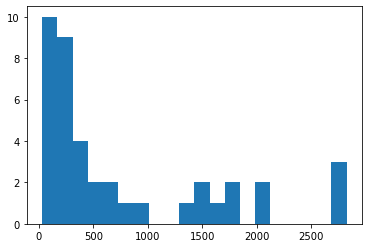

In [132]:
import matplotlib.pyplot as plt
plt.hist(business_admin_playlist['Age(days)'],bins=20)
plt.xlabel('Age(days)')
plt.ylabel('Count')
plt.title('Business Administration playlist')
plt.show()

#### above graph shows that most of the videos in our playlist were uploaded within one year or one and a half year.

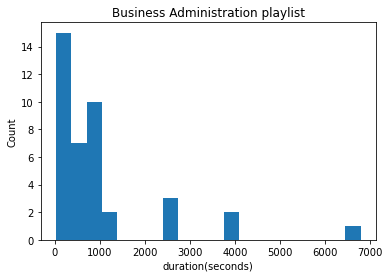

In [153]:
plt.hist(business_admin_playlist['duration(sec)'],bins=20)
plt.xlabel('duration(seconds)')
plt.ylabel('Count')
plt.title('Business Administration playlist')
plt.show()

#### above graph shows that more than 80% of the videos in our playlist were of duration less than 20 minutes.

#### Calculating z-score and score function for DS_ML_playlist in a similar way as above.

In [73]:
DS_ML_playlist.reset_index(drop=True,inplace=True)

In [75]:
DS_ML_playlist.shape[0]

1050

In [76]:
#Don't know why SettingWithCopyWarning is coming.But I have verified z-score calculation and it is correct.
DS_ML_playlist['zscore(views)']=stats.zscore(DS_ML_playlist.viewsCount)
DS_ML_playlist['zscore(likes)']=stats.zscore(DS_ML_playlist.likeCount)
DS_ML_playlist['zscore(dislikes)']=stats.zscore(DS_ML_playlist.dislikeCount)
DS_ML_playlist['Age_score']=0
for i in range(DS_ML_playlist.shape[0]):
    if (DS_ML_playlist.loc[i,'Age(days)']>1825) :
        DS_ML_playlist.loc[i,'Age_score']=-0.5

DS_ML_playlist['duration_score']=0
for i in range(DS_ML_playlist.shape[0]):
    if (DS_ML_playlist.loc[i,'duration(sec)']<300) :
        DS_ML_playlist.loc[i,'duration_score']=-0.5

DS_ML_playlist['score']=DS_ML_playlist['zscore(views)']+DS_ML_playlist['zscore(likes)']-(0.1*DS_ML_playlist['zscore(dislikes)'])+DS_ML_playlist['Age_score']+DS_ML_playlist['duration_score']

<ipython-input-76-e2bb8e887a53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DS_ML_playlist['zscore(views)']=stats.zscore(DS_ML_playlist.viewsCount)
<ipython-input-76-e2bb8e887a53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DS_ML_playlist['zscore(likes)']=stats.zscore(DS_ML_playlist.likeCount)
<ipython-input-76-e2bb8e887a53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [78]:
DS_ML_playlist=DS_ML_playlist.sort_values(by='score',ascending=False).reset_index(drop=True)

### Youtube is also giving results of some android development videos in datascience query,so removing them.

In [96]:
DS_ML_playlist=DS_ML_playlist[~DS_ML_playlist['Title'].str.contains('Android')]

In [98]:
DS_ML_playlist.reset_index(drop=True,inplace=True)

### Taking the top scoring 9 rows whose total duration is coming to be 11.2 hours

In [100]:
DS_ML_playlist['duration(sec)'].sum()

40291

### Our DS_ML playlist is ready

In [101]:
DS_ML_playlist

,topic,Title,videoID,publishTIME,duration,viewsCount,likeCount,dislikeCount,commentCount,duration(sec),Age(days),zscore(views),zscore(likes),zscore(dislikes),Age_score,duration_score,score
0,DS and ML,Daata {HD &amp; Eng Subs} - Hindi Full Movie -...,gUuosA9eQ7s,2018-03-13 14:30:01,PT2H50M45S,6131913,12306,5951,472,10245,891.0,19.173381,2.297623,25.507843,0.0,0.0,18.920220
1,DS and ML,What REALLY is Data Science? Told by a Data Sc...,xC-c7E5PK0Y,2018-06-23 01:51:50,PT11M9S,1531665,57745,783,2359,669,789.0,4.600561,11.987406,3.166206,0.0,0.0,16.271346
2,DS and ML,ПОЛОСАТЫЙ РЕЙС (советский фильм комедия),BVtergBNjAU,2017-01-31 07:35:15,PT1H23M34S,4123514,15825,1674,976,5014,1297.0,12.811107,3.048043,7.018063,0.0,0.0,15.157344
3,DS and ML,O que é ciência de dados | Nerdologia Tech,ykSILAQQu6o,2018-07-26 14:55:51,PT9M30S,294270,37687,204,777,570,756.0,0.680699,7.710074,0.663147,0.0,0.0,8.324459
4,DS and ML,Learn Data Science Tutorial - Full Course for ...,ua-CiDNNj30,2019-05-30 12:48:19,PT5H52M9S,914054,23696,343,612,21129,448.0,2.644072,4.726519,1.264054,0.0,0.0,7.244186
5,DS and ML,How To Learn Data Science Smartly?,csG_qfOTvxw,2019-08-22 15:15:04,PT12M13S,685144,25252,310,928,733,364.0,1.918923,5.058334,1.121393,0.0,0.0,6.865117
6,DS and ML,AI VS ML VS DL VS Data Science,k2P_pHQDlp0,2019-11-26 14:40:58,PT9M45S,713400,25167,500,860,585,268.0,2.008433,5.040207,1.942776,0.0,0.0,6.854363
7,DS and ML,A Day In The Life Of A Data Scientist,Ck0ozfJV9-g,2018-07-26 16:00:04,PT9M,1169536,20109,1473,1451,540,756.0,3.453396,3.961598,6.149125,0.0,0.0,6.800082
8,DS and ML,HOW TO BECOME DATA SCIENTIST IN 2020- in Hindi...,iLcvvVXBSFo,2019-11-16 10:27:24,PT13M26S,470199,29022,824,2707,806,278.0,1.238013,5.862279,3.343452,0.0,0.0,6.765947


### Doing some exploratory data analysis on DS and ML playlist

In [138]:
DS_ML_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   topic             9 non-null      object 
 1   Title             9 non-null      object 
 2   videoID           9 non-null      object 
 3   publishTIME       9 non-null      object 
 4   duration          9 non-null      object 
 5   viewsCount        9 non-null      int64  
 6   likeCount         9 non-null      int64  
 7   dislikeCount      9 non-null      int64  
 8   commentCount      9 non-null      int64  
 9   duration(sec)     9 non-null      int64  
 10  Age(days)         9 non-null      float64
 11  zscore(views)     9 non-null      float64
 12  zscore(likes)     9 non-null      float64
 13  zscore(dislikes)  9 non-null      float64
 14  Age_score         9 non-null      float64
 15  duration_score    9 non-null      float64
 16  score             9 non-null      float64
dtypes

In [139]:
DS_ML_playlist.describe()

,viewsCount,likeCount,dislikeCount,commentCount,duration(sec),Age(days),zscore(views),zscore(likes),zscore(dislikes),Age_score,duration_score,score
count,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.0,9.000000
mean,1.781522e+06,27423.222222,1340.222222,1238.000000,4476.777778,649.666667,5.392065,5.521343,5.575118,0.0,0.0,10.355896
std,1.996081e+06,13544.165605,1803.402186,787.301721,7060.047977,340.108439,6.323251,2.888268,7.796238,0.0,0.0,4.939400
min,2.942700e+05,12306.000000,204.000000,472.000000,540.000000,268.000000,0.680699,2.297623,0.663147,0.0,0.0,6.765947
25%,6.851440e+05,20109.000000,343.000000,777.000000,585.000000,364.000000,1.918923,3.961598,1.264054,0.0,0.0,6.854363
50%,9.140540e+05,25167.000000,783.000000,928.000000,733.000000,756.000000,2.644072,5.040207,3.166206,0.0,0.0,7.244186
75%,1.531665e+06,29022.000000,1473.000000,1451.000000,5014.000000,789.000000,4.600561,5.862279,6.149125,0.0,0.0,15.157344
max,6.131913e+06,57745.000000,5951.000000,2707.000000,21129.000000,1297.000000,19.173381,11.987406,25.507843,0.0,0.0,18.920220


#### Major Key findings of DS ML playlist
Max views of a video in our playlist is 6131913
Min views of a video in our playlist is 294270
Oldest video was uploaded almost 3.5 years ago.
Most Recent video was uploaded 9 months ago.
Duration of Longest video is almost 5.9 hours 
Duration of Shortest video is 9 minutes. 

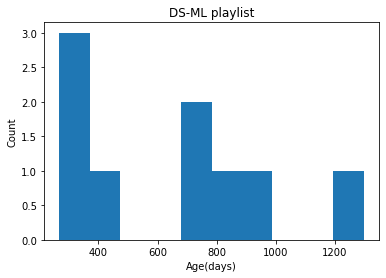

In [152]:
plt.hist(DS_ML_playlist['Age(days)'],bins=10)
plt.xlabel('Age(days)')
plt.ylabel('Count')
plt.title('DS-ML playlist')
plt.show()

#### above graph shows that most of the videos in our playlist were uploaded within three years.

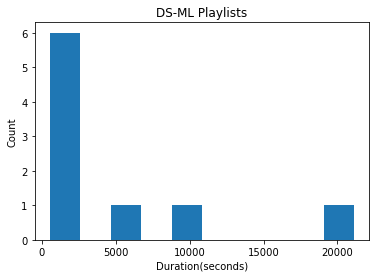

In [151]:
plt.hist(DS_ML_playlist['duration(sec)'],bins=10)
plt.xlabel('Duration(seconds)')
plt.ylabel('Count')
plt.title('DS-ML Playlists')
plt.show()

#### above graph shows that more than 80% of the videos in our playlist were of duration less than 1.5 hours.

#### Calculating z-score and score function for Android WebD playlist in a similar way as above.

In [ ]:
android_webd_playlist

In [103]:
android_webd_playlist.reset_index(drop=True,inplace=True)

In [105]:
android_webd_playlist.shape[0]

774

In [106]:
#Don't know why SettingWithCopyWarning is coming.But I have verified z-score calculation and it is correct.
android_webd_playlist['zscore(views)']=stats.zscore(android_webd_playlist.viewsCount)
android_webd_playlist['zscore(likes)']=stats.zscore(android_webd_playlist.likeCount)
android_webd_playlist['zscore(dislikes)']=stats.zscore(android_webd_playlist.dislikeCount)
android_webd_playlist['Age_score']=0
for i in range(android_webd_playlist.shape[0]):
    if (android_webd_playlist.loc[i,'Age(days)']>1825) :
        android_webd_playlist.loc[i,'Age_score']=-0.5

android_webd_playlist['duration_score']=0
for i in range(android_webd_playlist.shape[0]):
    if (android_webd_playlist.loc[i,'duration(sec)']<300) :
        android_webd_playlist.loc[i,'duration_score']=-0.5

android_webd_playlist['score']=android_webd_playlist['zscore(views)']+android_webd_playlist['zscore(likes)']-(0.1*android_webd_playlist['zscore(dislikes)'])+android_webd_playlist['Age_score']+android_webd_playlist['duration_score']


<ipython-input-106-94ac40c0d05e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_webd_playlist['zscore(views)']=stats.zscore(android_webd_playlist.viewsCount)
<ipython-input-106-94ac40c0d05e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_webd_playlist['zscore(likes)']=stats.zscore(android_webd_playlist.likeCount)
<ipython-input-106-94ac40c0d05e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [107]:
android_webd_playlist=android_webd_playlist.sort_values(by='score',ascending=False).reset_index(drop=True)

In [108]:
android_webd_playlist

,topic,Title,videoID,publishTIME,duration,viewsCount,likeCount,dislikeCount,commentCount,duration(sec),Age(days),zscore(views),zscore(likes),zscore(dislikes),Age_score,duration_score,score
0,Android and WebD,Python Tutorial - Python for Beginners [Full C...,_uQrJ0TkZlc,2019-02-18 15:00:08,PT6H14M7S,12434612,389216,3033,30263,22447,549.0,19.215795,23.312706,7.109645,0.0,0.0,41.817537
1,Android and WebD,How to Make a Website in 10 mins - Simple &amp...,YWA-xbsJrVg,2018-01-03 15:32:33,PT12M22S,9568015,209253,10403,12023,742,960.0,14.745457,12.464091,24.793678,0.0,0.0,24.730180
2,Android and WebD,Web Development Tutorial for Beginners (#1) - ...,3JluqTojuME,2013-10-21 23:21:08,PT14M8S,4041676,40444,650,2993,848,2494.0,6.127361,2.287867,1.391728,-0.5,0.0,7.776055
3,Android and WebD,How to Make an Android App for Beginners,EOfCEhWq8sg,2018-04-20 21:12:13,PT19M18S,3303933,47216,1842,1850,1158,852.0,4.976881,2.696100,4.251886,0.0,0.0,7.247792
4,Android and WebD,ПОЛОСАТЫЙ РЕЙС (советский фильм комедия),BVtergBNjAU,2017-01-31 07:35:15,PT1H23M34S,4123514,15825,1674,976,5014,1297.0,6.254984,0.803772,3.848777,0.0,0.0,6.673878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Android and WebD,Setting up Android Development Enviroment | Un...,e9YApCIx18Q,2014-11-01 08:56:56,PT4M50S,32008,152,31,31,290,2119.0,-0.125550,-0.141035,-0.093539,-0.5,-0.5,-1.257231
770,Android and WebD,Android Development Tutorials #12 - Generating...,3SEH6GElVGA,2013-02-13 03:43:26,PT3M46S,26842,71,2,4,226,2745.0,-0.133606,-0.145918,-0.163123,-0.5,-0.5,-1.263211
771,Android and WebD,Android Development for Adobe Flash in Visual ...,6S54lSnN_y4,2011-04-10 13:08:31,PT3M8S,9231,16,1,1,188,3420.0,-0.161070,-0.149233,-0.165523,-0.5,-0.5,-1.293751
772,Android and WebD,Starting Android development on Sitara AM335x ...,SboUsEHPsqU,2012-10-23 15:28:49,PT3M41S,8291,16,0,0,221,2858.0,-0.162535,-0.149233,-0.167922,-0.5,-0.5,-1.294976


### Taking the top scoring 5 rows whose total duration is coming to be 8.4 hours

In [118]:
android_webd_playlist[0:5]['duration(sec)'].sum()

30209

In [120]:
android_webd_playlist=android_webd_playlist[0:5]

### Our Android and webD playlist is ready.

In [121]:
android_webd_playlist

,topic,Title,videoID,publishTIME,duration,viewsCount,likeCount,dislikeCount,commentCount,duration(sec),Age(days),zscore(views),zscore(likes),zscore(dislikes),Age_score,duration_score,score
0,Android and WebD,Python Tutorial - Python for Beginners [Full C...,_uQrJ0TkZlc,2019-02-18 15:00:08,PT6H14M7S,12434612,389216,3033,30263,22447,549.0,19.215795,23.312706,7.109645,0.0,0.0,41.817537
1,Android and WebD,How to Make a Website in 10 mins - Simple &amp...,YWA-xbsJrVg,2018-01-03 15:32:33,PT12M22S,9568015,209253,10403,12023,742,960.0,14.745457,12.464091,24.793678,0.0,0.0,24.730180
2,Android and WebD,Web Development Tutorial for Beginners (#1) - ...,3JluqTojuME,2013-10-21 23:21:08,PT14M8S,4041676,40444,650,2993,848,2494.0,6.127361,2.287867,1.391728,-0.5,0.0,7.776055
3,Android and WebD,How to Make an Android App for Beginners,EOfCEhWq8sg,2018-04-20 21:12:13,PT19M18S,3303933,47216,1842,1850,1158,852.0,4.976881,2.696100,4.251886,0.0,0.0,7.247792
4,Android and WebD,ПОЛОСАТЫЙ РЕЙС (советский фильм комедия),BVtergBNjAU,2017-01-31 07:35:15,PT1H23M34S,4123514,15825,1674,976,5014,1297.0,6.254984,0.803772,3.848777,0.0,0.0,6.673878


### Doing some exploratory data analysis on Android and WebD playlist

In [142]:
android_webd_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   topic             5 non-null      object 
 1   Title             5 non-null      object 
 2   videoID           5 non-null      object 
 3   publishTIME       5 non-null      object 
 4   duration          5 non-null      object 
 5   viewsCount        5 non-null      int64  
 6   likeCount         5 non-null      int64  
 7   dislikeCount      5 non-null      int64  
 8   commentCount      5 non-null      int64  
 9   duration(sec)     5 non-null      int64  
 10  Age(days)         5 non-null      float64
 11  zscore(views)     5 non-null      float64
 12  zscore(likes)     5 non-null      float64
 13  zscore(dislikes)  5 non-null      float64
 14  Age_score         5 non-null      float64
 15  duration_score    5 non-null      float64
 16  score             5 non-null      float64
dtypes

In [143]:
android_webd_playlist.describe()

,viewsCount,likeCount,dislikeCount,commentCount,duration(sec),Age(days),zscore(views),zscore(likes),zscore(dislikes),Age_score,duration_score,score
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000
mean,6.694350e+06,140390.800000,3520.400000,9621.000000,6041.800000,1230.400000,10.264096,8.312907,8.279143,-0.100000,0.0,17.649088
std,4.072756e+06,158779.349617,3939.325996,12358.363747,9342.134403,755.269687,6.351293,9.571612,9.452262,0.223607,0.0,15.494957
min,3.303933e+06,15825.000000,650.000000,976.000000,742.000000,549.000000,4.976881,0.803772,1.391728,-0.500000,0.0,6.673878
25%,4.041676e+06,40444.000000,1674.000000,1850.000000,848.000000,852.000000,6.127361,2.287867,3.848777,0.000000,0.0,7.247792
50%,4.123514e+06,47216.000000,1842.000000,2993.000000,1158.000000,960.000000,6.254984,2.696100,4.251886,0.000000,0.0,7.776055
75%,9.568015e+06,209253.000000,3033.000000,12023.000000,5014.000000,1297.000000,14.745457,12.464091,7.109645,0.000000,0.0,24.730180
max,1.243461e+07,389216.000000,10403.000000,30263.000000,22447.000000,2494.000000,19.215795,23.312706,24.793678,0.000000,0.0,41.817537


#### Major Key findings of Android and WebD playlist
Max views of a video in our playlist is 12434610
Min views of a video in our playlist is 3303933
Oldest video was uploaded almost 6.8 years ago.
Most Recent video was uploaded 1.5 years ago.
Duration of Longest video is almost 6.25 hours 
Duration of Shortest video is 12.5 minutes. 

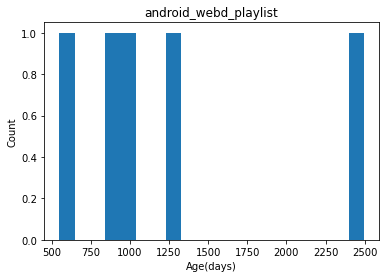

In [149]:
plt.hist(android_webd_playlist['Age(days)'],bins=20)
plt.xlabel('Age(days)')
plt.ylabel('Count')
plt.title('android_webd_playlist')
plt.show()

#### above graph shows that 4 of the videos in our playlist were uploaded within 4 years and one is way too older.

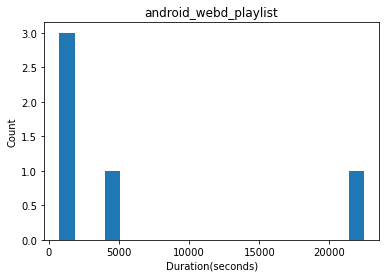

In [150]:
plt.hist(android_webd_playlist['duration(sec)'],bins=20)
plt.xlabel('Duration(seconds)')
plt.ylabel('Count')
plt.title('android_webd_playlist')
plt.show()

#### above graph shows that more than 3 of the videos in our playlist were of duration less than 1.5 hours.

### Saving these final playlists to different csv files.

In [123]:
business_admin_playlist.to_csv('business_admin_playlist.csv',index=False)
DS_ML_playlist.to_csv('DS_ML_playlist.csv',index=False)
android_webd_playlist.to_csv('android_webd_playlist.csv',index=False)
